Learned from **YTbe**, channel - **Krish Naik**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [6]:
tnc = pd.read_csv('titanic/train.csv')

In [7]:
tnc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
tnc.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
tnc.shape

(891, 12)

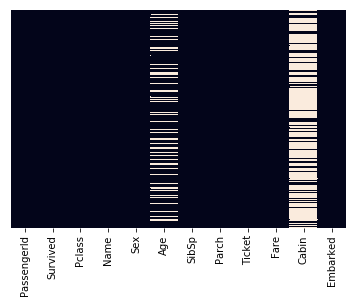

In [15]:
sb.heatmap(tnc.isnull(),yticklabels=False,cbar=False)

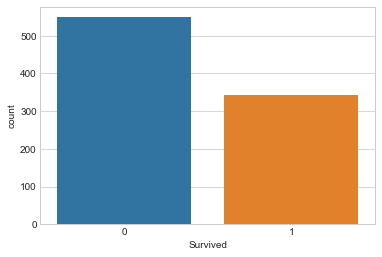

In [16]:
sb.set_style('whitegrid')
sb.countplot(x='Survived',data=tnc)

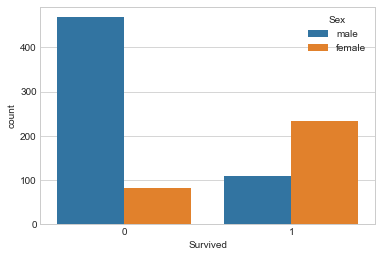

In [17]:
sb.countplot(x='Survived',hue='Sex', data=tnc) #Priority was given to Female Gender

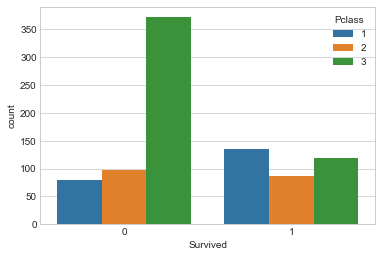

In [19]:
sb.countplot(x='Survived',hue='Pclass', data=tnc) #Class 1 isof Rich and Class 3 is least expensive

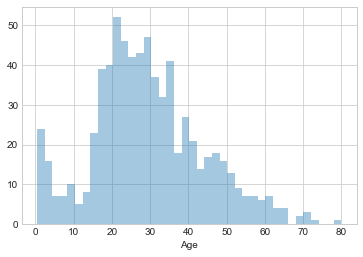

In [21]:
sb.distplot(tnc.Age.dropna(),kde=False,bins=40)

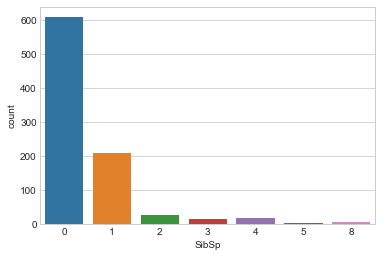

In [22]:
sb.countplot(x='SibSp', data=tnc) #Most of the people travelled solo on titanic

In [27]:
tnc.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## **Data Cleaning**


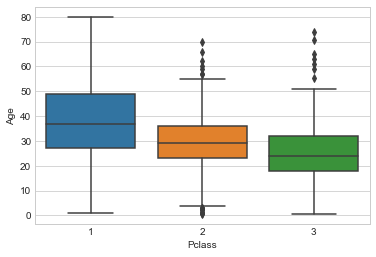

In [26]:
sb.boxplot(x='Pclass',y='Age', data=tnc)

**Age** Not directly replaced with **mean** value as Age cahnges considerably with Passesnger class, so below will be more accurate replacement of Missing Values

In [28]:
 def impute_age(col):
        Age = col[0]
        Pclass = col[1]
        
        if pd.isnull(Age):
            if Pclass == 1:
                return 37
            elif Pclass == 2:
                return 28
            else:
                return 24
        else:
            return Age

In [29]:
tnc['Age'] = tnc[['Age','Pclass']].apply(impute_age,axis=1)

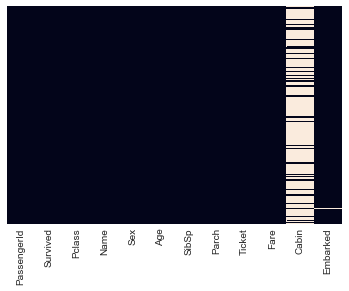

In [30]:
sb.heatmap(tnc.isnull(),cbar=False,yticklabels=False)

In [35]:
tnc.Embarked.describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [32]:
tnc.drop('Cabin',axis=1,inplace=True)

In [34]:
tnc.Embarked.fillna(value='S',inplace=True) #Used S since it's most frequent in the categorical col Embarked with only 2 NAN